ESTADÍSTICAS DESCRIPTIVAS BÁSICAS

✓ Archivos cargados correctamente:
  - Clientes:           100 registros,  5 columnas
  - Ventas:             120 registros,  6 columnas
  - Detalle ventas:     343 registros,  7 columnas
  - Productos:          100 registros,  4 columnas

--------------------------------------------------------------------------------
PREPARACIÓN DE DATOS
--------------------------------------------------------------------------------

✓ Datos preparados correctamente

1. ESTADÍSTICAS DESCRIPTIVAS - DETALLE DE VENTAS

📊 IMPORTE POR LÍNEA DE VENTA
--------------------------------------------------------------------------------

Número de registros:              342
Media (promedio):        $    7,730.00
Desviación estándar:     $    5,273.26
Valor mínimo:            $      272.00
Percentil 25 (Q1):       $    3,488.50
Mediana (Q2):            $    6,702.00
Percentil 75 (Q3):       $   10,233.75
Valor máximo:            $   24,865.00

Rango (Max - Min):       $   24,59

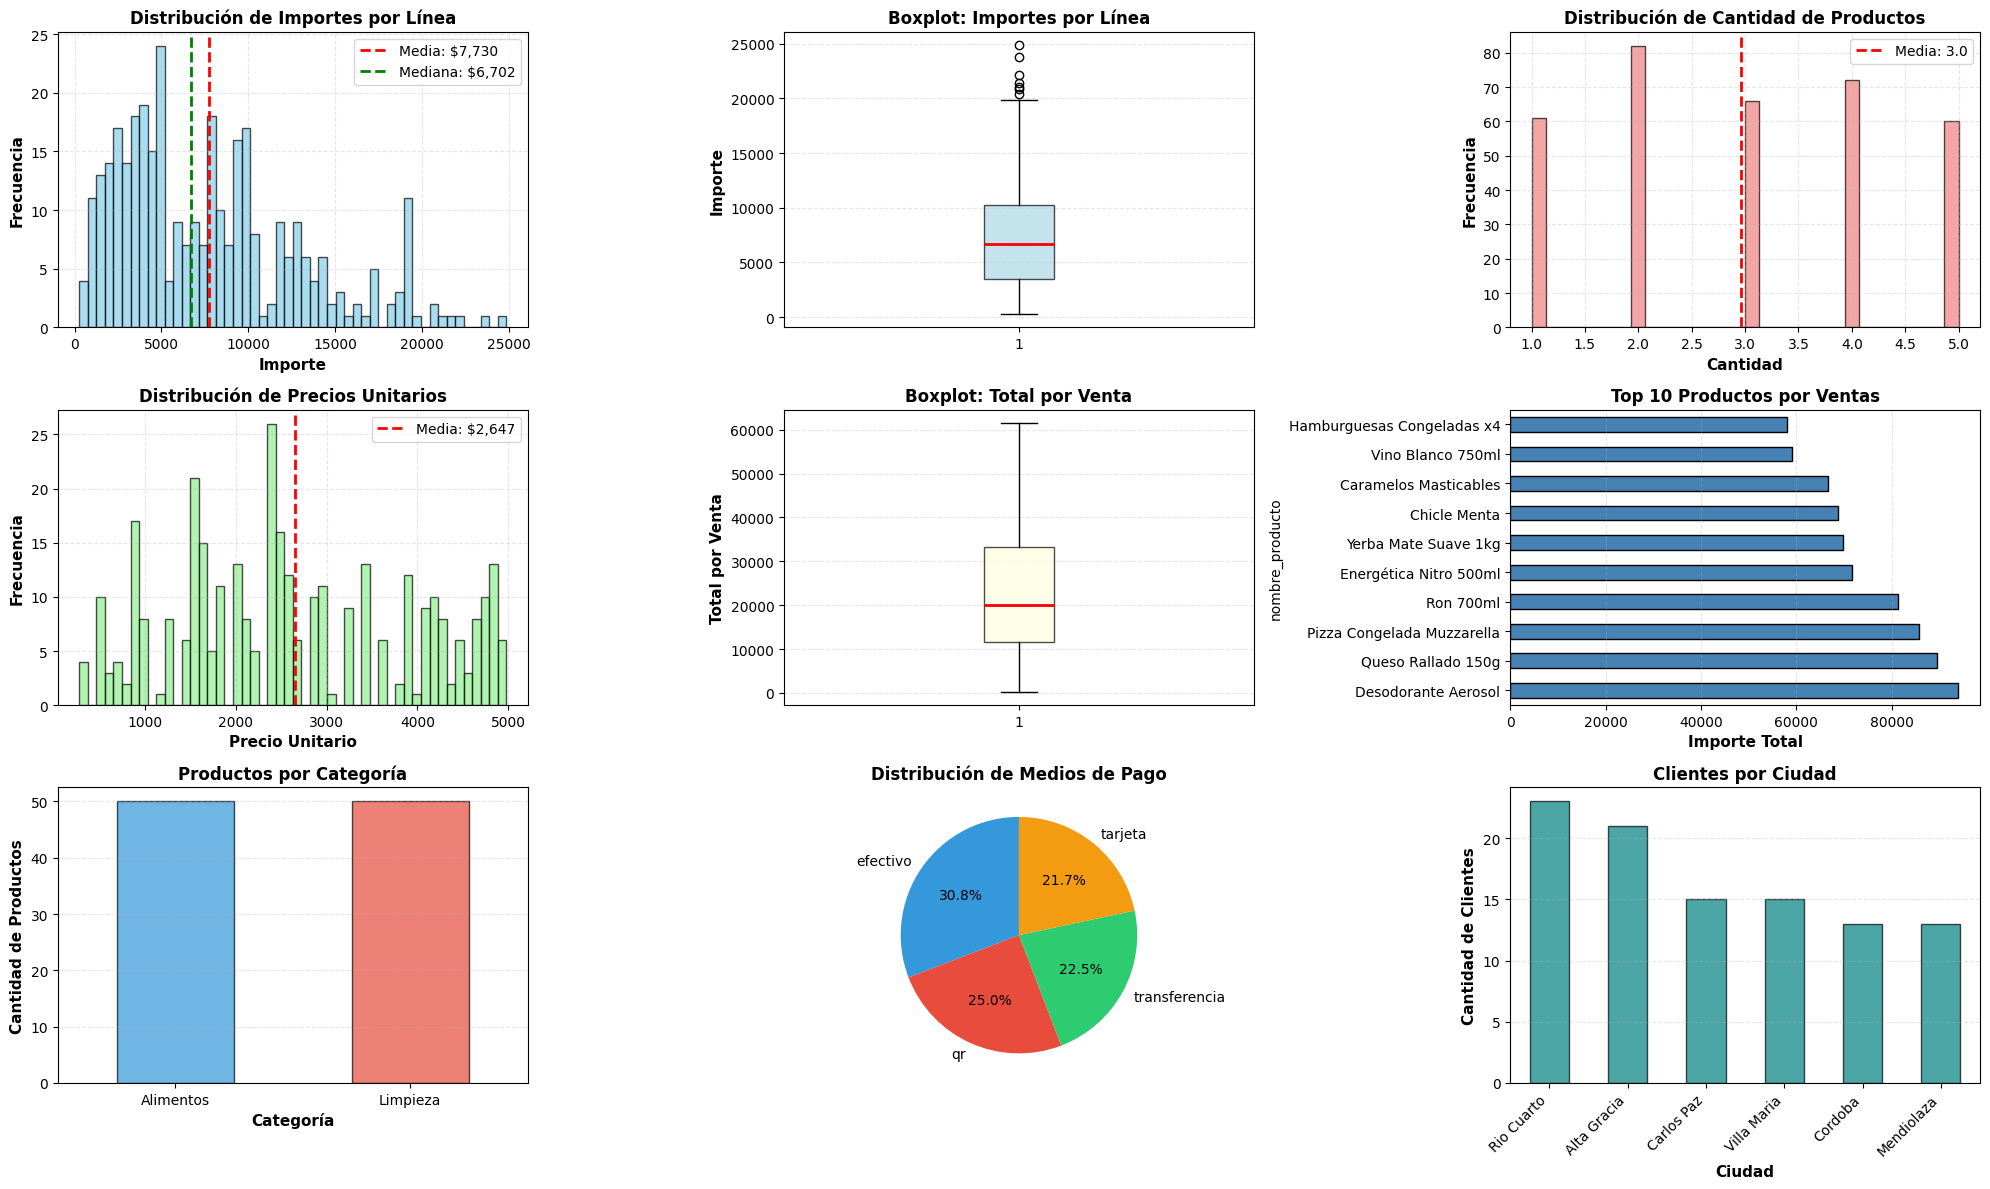


RESUMEN EJECUTIVO

📊 DATOS GENERALES:
  • Total de clientes:              100
  • Total de ventas:                120
  • Total de líneas de detalle:     342
  • Total de productos:             100

💰 VENTAS:
  • Ticket promedio:             $ 22,030.51
  • Venta mínima:                $    272.00
  • Venta máxima:                $ 61,503.00
  • Importe total vendido:       $2,643,661.00

📦 PRODUCTOS:
  • Precio promedio:             $  2,718.55
  • Producto más barato:         $    272.00
  • Producto más caro:           $  4,982.00
  • Categorías:                       2

💳 MEDIOS DE PAGO:
  • Más usado:                   efectivo (30.8%)
  • Menos usado:                 tarjeta (21.7%)

ANÁLISIS COMPLETADO EXITOSAMENTE

📁 Archivo generado:
   - estadisticas_descriptivas.png


In [10]:
# ============================================================================
# ESTADÍSTICAS DESCRIPTIVAS BÁSICAS
# ============================================================================
# Este análisis calcula las principales medidas estadísticas de los datos
# de ventas, productos y clientes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.float_format', '{:,.2f}'.format)

# %% CARGA DE DATOS
print("="*80)
print("ESTADÍSTICAS DESCRIPTIVAS BÁSICAS")
print("="*80)

# Definir la ruta donde están los archivos Excel
ruta = r'C:\Users\PROBOOK\OneDrive\Desktop\Demo\Datos'

# Cargar los archivos
try:
    clientes = pd.read_excel(f'{ruta}\\Clientes.xlsx')
    ventas = pd.read_excel(f'{ruta}\\Ventas.xlsx')
    detalle_ventas = pd.read_excel(f'{ruta}\\Detalle_ventas.xlsx')
    productos = pd.read_excel(f'{ruta}\\Productos.xlsx')
    
    print(f"\n✓ Archivos cargados correctamente:")
    print(f"  - Clientes:        {len(clientes):>6} registros, {len(clientes.columns):>2} columnas")
    print(f"  - Ventas:          {len(ventas):>6} registros, {len(ventas.columns):>2} columnas")
    print(f"  - Detalle ventas:  {len(detalle_ventas):>6} registros, {len(detalle_ventas.columns):>2} columnas")
    print(f"  - Productos:       {len(productos):>6} registros, {len(productos.columns):>2} columnas")
    
except FileNotFoundError as e:
    print(f"\n✖ ERROR: No se encontró el archivo")
    print(f"  Verifica que la ruta sea correcta: {ruta}")
    print(f"  Error: {e}")
    raise
except Exception as e:
    print(f"\n✖ ERROR al cargar los archivos: {e}")
    raise

# %% PREPARACIÓN DE DATOS
print("\n" + "-"*80)
print("PREPARACIÓN DE DATOS")
print("-"*80)

# Convertir fecha a datetime
ventas['fecha'] = pd.to_datetime(ventas['fecha'])

# Limpiar columna 'importe' en detalle_ventas (eliminar valores NaN)
detalle_ventas['importe'] = pd.to_numeric(detalle_ventas['importe'], errors='coerce')
detalle_ventas = detalle_ventas.dropna(subset=['importe'])

# Calcular totales por venta
totales_por_venta = detalle_ventas.groupby('id_venta').agg({
    'importe': 'sum',
    'cantidad': 'sum'
}).reset_index()

# Unir con información de ventas
ventas_completas = ventas.merge(totales_por_venta, on='id_venta', how='left')

# Calcular precio promedio por venta
ventas_completas['precio_promedio'] = ventas_completas['importe'] / ventas_completas['cantidad']
ventas_completas['precio_promedio'] = ventas_completas['precio_promedio'].replace([np.inf, -np.inf], np.nan)

print("\n✓ Datos preparados correctamente")

# %% ESTADÍSTICAS DESCRIPTIVAS - DETALLE DE VENTAS
print("\n" + "="*80)
print("1. ESTADÍSTICAS DESCRIPTIVAS - DETALLE DE VENTAS")
print("="*80)

print("\n📊 IMPORTE POR LÍNEA DE VENTA")
print("-"*80)

# Calcular estadísticas
stats_importe = detalle_ventas['importe'].describe()

print(f"\nNúmero de registros:     {stats_importe['count']:>12,.0f}")
print(f"Media (promedio):        ${stats_importe['mean']:>12,.2f}")
print(f"Desviación estándar:     ${stats_importe['std']:>12,.2f}")
print(f"Valor mínimo:            ${stats_importe['min']:>12,.2f}")
print(f"Percentil 25 (Q1):       ${stats_importe['25%']:>12,.2f}")
print(f"Mediana (Q2):            ${stats_importe['50%']:>12,.2f}")
print(f"Percentil 75 (Q3):       ${stats_importe['75%']:>12,.2f}")
print(f"Valor máximo:            ${stats_importe['max']:>12,.2f}")

# Calcular métricas adicionales
rango = stats_importe['max'] - stats_importe['min']
iqr = stats_importe['75%'] - stats_importe['25%']
cv = (stats_importe['std'] / stats_importe['mean']) * 100 if stats_importe['mean'] != 0 else 0
asimetria = detalle_ventas['importe'].skew()
curtosis = detalle_ventas['importe'].kurtosis()

print(f"\nRango (Max - Min):       ${rango:>12,.2f}")
print(f"Rango Intercuartílico:   ${iqr:>12,.2f}")
print(f"Coeficiente de variación: {cv:>11,.2f}%")
print(f"Asimetría (Skewness):     {asimetria:>12,.2f}")
print(f"Curtosis (Kurtosis):      {curtosis:>12,.2f}")

print("\n💡 INTERPRETACIÓN:")
if cv < 15:
    print("  ✓ Baja variabilidad - Los importes son homogéneos")
elif cv < 30:
    print("  ⚠ Variabilidad moderada - Hay cierta dispersión en los importes")
else:
    print("  ⚠ Alta variabilidad - Los importes son muy heterogéneos")

if asimetria > 1:
    print("  ⚠ Asimetría positiva fuerte - Hay valores altos que sesgan la distribución")
elif asimetria > 0.5:
    print("  ⚠ Asimetría positiva moderada - Distribución ligeramente sesgada a la derecha")
elif asimetria < -0.5:
    print("  ⚠ Asimetría negativa - Distribución sesgada a la izquierda")
else:
    print("  ✓ Distribución aproximadamente simétrica")

# %% ESTADÍSTICAS - CANTIDAD DE PRODUCTOS
print("\n" + "-"*80)
print("📊 CANTIDAD DE PRODUCTOS POR LÍNEA")
print("-"*80)

stats_cantidad = detalle_ventas['cantidad'].describe()

print(f"\nNúmero de registros:     {stats_cantidad['count']:>12,.0f}")
print(f"Media (promedio):        {stats_cantidad['mean']:>12,.2f} unidades")
print(f"Desviación estándar:     {stats_cantidad['std']:>12,.2f} unidades")
print(f"Valor mínimo:            {stats_cantidad['min']:>12,.0f} unidades")
print(f"Percentil 25 (Q1):       {stats_cantidad['25%']:>12,.0f} unidades")
print(f"Mediana (Q2):            {stats_cantidad['50%']:>12,.0f} unidades")
print(f"Percentil 75 (Q3):       {stats_cantidad['75%']:>12,.0f} unidades")
print(f"Valor máximo:            {stats_cantidad['max']:>12,.0f} unidades")

# %% ESTADÍSTICAS - PRECIO UNITARIO
print("\n" + "-"*80)
print("📊 PRECIO UNITARIO DE PRODUCTOS")
print("-"*80)

stats_precio = detalle_ventas['precio_unitario'].describe()

print(f"\nNúmero de registros:     {stats_precio['count']:>12,.0f}")
print(f"Media (promedio):        ${stats_precio['mean']:>12,.2f}")
print(f"Desviación estándar:     ${stats_precio['std']:>12,.2f}")
print(f"Valor mínimo:            ${stats_precio['min']:>12,.2f}")
print(f"Percentil 25 (Q1):       ${stats_precio['25%']:>12,.2f}")
print(f"Mediana (Q2):            ${stats_precio['50%']:>12,.2f}")
print(f"Percentil 75 (Q3):       ${stats_precio['75%']:>12,.2f}")
print(f"Valor máximo:            ${stats_precio['max']:>12,.2f}")

# %% ESTADÍSTICAS - TOTAL POR VENTA
print("\n" + "="*80)
print("2. ESTADÍSTICAS DESCRIPTIVAS - TOTAL POR VENTA")
print("="*80)

stats_total = totales_por_venta['importe'].describe()

print(f"\nNúmero de ventas:        {stats_total['count']:>12,.0f}")
print(f"Media (promedio):        ${stats_total['mean']:>12,.2f}")
print(f"Desviación estándar:     ${stats_total['std']:>12,.2f}")
print(f"Valor mínimo:            ${stats_total['min']:>12,.2f}")
print(f"Percentil 25 (Q1):       ${stats_total['25%']:>12,.2f}")
print(f"Mediana (Q2):            ${stats_total['50%']:>12,.2f}")
print(f"Percentil 75 (Q3):       ${stats_total['75%']:>12,.2f}")
print(f"Valor máximo:            ${stats_total['max']:>12,.2f}")

# Ticket promedio
ticket_promedio = stats_total['mean']
print(f"\n💰 TICKET PROMEDIO: ${ticket_promedio:,.2f}")

# %% ESTADÍSTICAS - PRODUCTOS
print("\n" + "="*80)
print("3. ESTADÍSTICAS DESCRIPTIVAS - PRODUCTOS")
print("="*80)

print(f"\nTotal de productos:      {len(productos):>12,}")
print(f"\nCategorías disponibles:")
categorias = productos['categoria'].value_counts()
for cat, count in categorias.items():
    porcentaje = (count / len(productos)) * 100
    print(f"  - {cat:<20} {count:>5} productos ({porcentaje:>5.1f}%)")

print("\n📊 PRECIO UNITARIO EN CATÁLOGO")
print("-"*80)

stats_precio_prod = productos['precio_unitario'].describe()

print(f"\nMedia (promedio):        ${stats_precio_prod['mean']:>12,.2f}")
print(f"Desviación estándar:     ${stats_precio_prod['std']:>12,.2f}")
print(f"Valor mínimo:            ${stats_precio_prod['min']:>12,.2f}")
print(f"Mediana (Q2):            ${stats_precio_prod['50%']:>12,.2f}")
print(f"Valor máximo:            ${stats_precio_prod['max']:>12,.2f}")

# Estadísticas por categoría
print("\n📊 PRECIO PROMEDIO POR CATEGORÍA")
print("-"*80)
for cat in productos['categoria'].unique():
    precio_cat = productos[productos['categoria'] == cat]['precio_unitario']
    print(f"\n{cat}:")
    print(f"  Media:    ${precio_cat.mean():>10,.2f}")
    print(f"  Mediana:  ${precio_cat.median():>10,.2f}")
    print(f"  Mínimo:   ${precio_cat.min():>10,.2f}")
    print(f"  Máximo:   ${precio_cat.max():>10,.2f}")

# %% ESTADÍSTICAS - CLIENTES
print("\n" + "="*80)
print("4. ESTADÍSTICAS DESCRIPTIVAS - CLIENTES")
print("="*80)

print(f"\nTotal de clientes:       {len(clientes):>12,}")

# Clientes por ciudad
print("\n📍 DISTRIBUCIÓN POR CIUDAD")
print("-"*80)
ciudades = clientes['ciudad'].value_counts()
for ciudad, count in ciudades.items():
    porcentaje = (count / len(clientes)) * 100
    print(f"  {ciudad:<20} {count:>5} clientes ({porcentaje:>5.1f}%)")

# Valores nulos
print("\n📋 VALORES NULOS POR COLUMNA")
print("-"*80)
nulos = clientes.isnull().sum()
for col, count in nulos.items():
    porcentaje = (count / len(clientes)) * 100
    if count > 0:
        print(f"  {col:<20} {count:>5} nulos ({porcentaje:>5.1f}%)")
    else:
        print(f"  {col:<20} {count:>5} nulos (✓)")

# %% ESTADÍSTICAS - MEDIOS DE PAGO
print("\n" + "="*80)
print("5. ESTADÍSTICAS DESCRIPTIVAS - MEDIOS DE PAGO")
print("="*80)

medios_pago = ventas['medio_pago'].value_counts()
total_ventas = len(ventas)

print("\n📊 DISTRIBUCIÓN DE MEDIOS DE PAGO")
print("-"*80)
for medio, count in medios_pago.items():
    porcentaje = (count / total_ventas) * 100
    print(f"  {medio:<20} {count:>5} ventas ({porcentaje:>5.1f}%)")

# %% VISUALIZACIONES
print("\n" + "="*80)
print("GENERANDO VISUALIZACIONES")
print("="*80)

# Crear figura con múltiples subplots
fig = plt.figure(figsize=(20, 12))

# 1. Histograma de importes por línea
plt.subplot(3, 3, 1)
plt.hist(detalle_ventas['importe'], bins=50, color='skyblue', edgecolor='black', alpha=0.7)
plt.axvline(detalle_ventas['importe'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: ${detalle_ventas["importe"].mean():,.0f}')
plt.axvline(detalle_ventas['importe'].median(), color='green', linestyle='--', linewidth=2, label=f'Mediana: ${detalle_ventas["importe"].median():,.0f}')
plt.xlabel('Importe', fontsize=11, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=11, fontweight='bold')
plt.title('Distribución de Importes por Línea', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')

# 2. Boxplot de importes
plt.subplot(3, 3, 2)
plt.boxplot(detalle_ventas['importe'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightblue', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('Importe', fontsize=11, fontweight='bold')
plt.title('Boxplot: Importes por Línea', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--', axis='y')

# 3. Histograma de cantidad
plt.subplot(3, 3, 3)
plt.hist(detalle_ventas['cantidad'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(detalle_ventas['cantidad'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: {detalle_ventas["cantidad"].mean():.1f}')
plt.xlabel('Cantidad', fontsize=11, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=11, fontweight='bold')
plt.title('Distribución de Cantidad de Productos', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')

# 4. Histograma de precios unitarios
plt.subplot(3, 3, 4)
plt.hist(detalle_ventas['precio_unitario'], bins=50, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(detalle_ventas['precio_unitario'].mean(), color='red', linestyle='--', linewidth=2, label=f'Media: ${detalle_ventas["precio_unitario"].mean():,.0f}')
plt.xlabel('Precio Unitario', fontsize=11, fontweight='bold')
plt.ylabel('Frecuencia', fontsize=11, fontweight='bold')
plt.title('Distribución de Precios Unitarios', fontsize=12, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3, linestyle='--')

# 5. Boxplot de total por venta
plt.subplot(3, 3, 5)
plt.boxplot(totales_por_venta['importe'], vert=True, patch_artist=True,
            boxprops=dict(facecolor='lightyellow', alpha=0.7),
            medianprops=dict(color='red', linewidth=2))
plt.ylabel('Total por Venta', fontsize=11, fontweight='bold')
plt.title('Boxplot: Total por Venta', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--', axis='y')

# 6. Top 10 productos más vendidos
plt.subplot(3, 3, 6)
top_productos = detalle_ventas.groupby('nombre_producto')['importe'].sum().nlargest(10)
top_productos.plot(kind='barh', color='steelblue', edgecolor='black')
plt.xlabel('Importe Total', fontsize=11, fontweight='bold')
plt.title('Top 10 Productos por Ventas', fontsize=12, fontweight='bold')
plt.grid(alpha=0.3, linestyle='--', axis='x')

# 7. Distribución por categoría
plt.subplot(3, 3, 7)
categorias.plot(kind='bar', color=['#3498db', '#e74c3c'], edgecolor='black', alpha=0.7)
plt.xlabel('Categoría', fontsize=11, fontweight='bold')
plt.ylabel('Cantidad de Productos', fontsize=11, fontweight='bold')
plt.title('Productos por Categoría', fontsize=12, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(alpha=0.3, linestyle='--', axis='y')

# 8. Distribución de medios de pago
plt.subplot(3, 3, 8)
medios_pago.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['#3498db', '#e74c3c', '#2ecc71', '#f39c12'])
plt.ylabel('')
plt.title('Distribución de Medios de Pago', fontsize=12, fontweight='bold')

# 9. Clientes por ciudad
plt.subplot(3, 3, 9)
ciudades.plot(kind='bar', color='teal', edgecolor='black', alpha=0.7)
plt.xlabel('Ciudad', fontsize=11, fontweight='bold')
plt.ylabel('Cantidad de Clientes', fontsize=11, fontweight='bold')
plt.title('Clientes por Ciudad', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(alpha=0.3, linestyle='--', axis='y')

plt.tight_layout()
plt.savefig('estadisticas_descriptivas.png', dpi=300, bbox_inches='tight')
print("\n✓ Gráfico guardado: estadisticas_descriptivas.png")
plt.show()

# %% RESUMEN EJECUTIVO
print("\n" + "="*80)
print("RESUMEN EJECUTIVO")
print("="*80)

print(f"""
📊 DATOS GENERALES:
  • Total de clientes:           {len(clientes):>6,}
  • Total de ventas:             {len(ventas):>6,}
  • Total de líneas de detalle:  {len(detalle_ventas):>6,}
  • Total de productos:          {len(productos):>6,}

💰 VENTAS:
  • Ticket promedio:             ${ticket_promedio:>10,.2f}
  • Venta mínima:                ${stats_total['min']:>10,.2f}
  • Venta máxima:                ${stats_total['max']:>10,.2f}
  • Importe total vendido:       ${detalle_ventas['importe'].sum():>10,.2f}

📦 PRODUCTOS:
  • Precio promedio:             ${stats_precio_prod['mean']:>10,.2f}
  • Producto más barato:         ${stats_precio_prod['min']:>10,.2f}
  • Producto más caro:           ${stats_precio_prod['max']:>10,.2f}
  • Categorías:                  {len(productos['categoria'].unique()):>6}

💳 MEDIOS DE PAGO:
  • Más usado:                   {medios_pago.index[0]} ({(medios_pago.iloc[0]/total_ventas*100):.1f}%)
  • Menos usado:                 {medios_pago.index[-1]} ({(medios_pago.iloc[-1]/total_ventas*100):.1f}%)
""")

print("="*80)
print("ANÁLISIS COMPLETADO EXITOSAMENTE")
print("="*80)
print("\n📁 Archivo generado:")
print("   - estadisticas_descriptivas.png")